In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [305]:
df = pd.read_excel('products_integrated_features.xlsx')
df.head()

,url,product_name,brand,category,price,rating,skin_type,total_reviews,skin_concern,ingredients,skin_goal,age,rating_star
0,https://reviews.femaledaily.com/products/clean...,Air Mawar,Viva Cosmetics,Toner,4800,4.1,"['combination', 'oily']",741820,"['irritation', 'dryness', 'acne', 'sensitive',...","['aha', 'bha', 'hyaluronic acid', 'green tea',...","['calming', 'refreshing', 'glowing', 'fast-abs...",19 - 24,4.786207
1,https://reviews.femaledaily.com/products/clean...,Face Tonic,Viva Cosmetics,Toner,5000,4.0,"['dry', 'combination']",66944,"['pores', 'acne', 'irritation', 'sensitive', '...","['aloe vera', 'green tea']","['nourishing', 'refreshing', 'anti-aging', 'ca...",19 - 24,4.484375
2,https://reviews.femaledaily.com/products/clean...,Face Tonic,Viva Cosmetics,Toner,5000,3.7,"['combination', 'oily']",35724,"['acne', 'irritation', 'oiliness', 'pores', 'r...","['vitamin c', 'green tea']","['oil-control', 'refreshing', 'calming']",19 - 24,4.461538
3,https://reviews.femaledaily.com/products/treat...,Acne Lotion,Viva Cosmetics,Acne treatment,5150,3.7,"['combination', 'oily']",17776,"['acne', 'redness', 'oiliness', 'blackheads', ...","['zinc', 'tea tree', 'vitamin c']","['scar-fading', 'calming']",19 - 24,4.297030
4,https://reviews.femaledaily.com/products/clean...,Astringent,Viva Cosmetics,Toner,5300,3.8,"['oily', 'combination']",131544,"['acne', 'irritation', 'oiliness', 'pores', 'b...",['green tea'],"['pore-minimizing', 'refreshing', 'calming', '...",19 - 24,4.342593


In [306]:
df = df[['skin_type','skin_concern','skin_goal','ingredients']]
df.head()

,skin_type,skin_concern,skin_goal,ingredients
0,"['combination', 'oily']","['irritation', 'dryness', 'acne', 'sensitive',...","['calming', 'refreshing', 'glowing', 'fast-abs...","['aha', 'bha', 'hyaluronic acid', 'green tea',..."
1,"['dry', 'combination']","['pores', 'acne', 'irritation', 'sensitive', '...","['nourishing', 'refreshing', 'anti-aging', 'ca...","['aloe vera', 'green tea']"
2,"['combination', 'oily']","['acne', 'irritation', 'oiliness', 'pores', 'r...","['oil-control', 'refreshing', 'calming']","['vitamin c', 'green tea']"
3,"['combination', 'oily']","['acne', 'redness', 'oiliness', 'blackheads', ...","['scar-fading', 'calming']","['zinc', 'tea tree', 'vitamin c']"
4,"['oily', 'combination']","['acne', 'irritation', 'oiliness', 'pores', 'b...","['pore-minimizing', 'refreshing', 'calming', '...",['green tea']


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   skin_type     918 non-null    object
 1   skin_concern  918 non-null    object
 2   skin_goal     918 non-null    object
 3   ingredients   918 non-null    object
dtypes: object(4)
memory usage: 28.8+ KB


In [308]:
import ast

def flatten_list(nested_lst):
    flat = []
    for item in nested_lst:
        if isinstance(item, list):
            flat.extend(flatten_list(item))
        else:
            flat.append(item)
    return flat

def parse_and_clean(cell):
    # Kalau tipe string, coba literal_eval ke list Python
    if isinstance(cell, str):
        try:
            lst = ast.literal_eval(cell)
        except:
            # Kalau gagal eval, anggap saja string biasa dan bungkus jadi list
            lst = [cell]
    else:
        lst = cell

    # Flatten nested list (misal list di dalam list)
    flat_list = flatten_list(lst)

    # Split elemen yang masih berupa gabungan string dengan koma
    split_list = []
    for item in flat_list:
        if isinstance(item, str):
            parts = [part.strip() for part in item.split(',')]
            split_list.extend(parts)
        else:
            # Kalau bukan string, langsung masukkan
            split_list.append(str(item).strip())

    # Normalisasi dan hapus duplikat
    seen = set()
    result = []
    for item in split_list:
        item_norm = item.lower()
        if item_norm and item_norm not in seen:
            seen.add(item_norm)
            result.append(item_norm)

    return result

In [309]:
cols = df.columns
for col in cols:
    df[col] = df[col].apply(parse_and_clean)

df.head()

,skin_type,skin_concern,skin_goal,ingredients
0,"[combination, oily]","[irritation, dryness, acne, sensitive, tiny bu...","[calming, refreshing, glowing, fast-absorbing,...","[aha, bha, hyaluronic acid, green tea, vitamin e]"
1,"[dry, combination]","[pores, acne, irritation, sensitive, dryness, ...","[nourishing, refreshing, anti-aging, calming, ...","[aloe vera, green tea]"
2,"[combination, oily]","[acne, irritation, oiliness, pores, redness, b...","[oil-control, refreshing, calming]","[vitamin c, green tea]"
3,"[combination, oily]","[acne, redness, oiliness, blackheads, tiny bum...","[scar-fading, calming]","[zinc, tea tree, vitamin c]"
4,"[oily, combination]","[acne, irritation, oiliness, pores, blackheads...","[pore-minimizing, refreshing, calming, oil-con...",[green tea]


In [310]:
# Cek berapa banyak list kosong di tiap kolom
for col in df.columns:
    empty_count = df[col].apply(lambda x: isinstance(x, list) and len(x) == 0).sum()
    print(f"{col}: {empty_count} list kosong")
print()

# Cek jumlah unknown
total = len(df)
for col in cols:
    count = df[col].apply(lambda x: 'unknown' in x).sum()
    percent = count / total * 100
    print(f"{col}: {count} baris ({percent:.2f}%) mengandung 'unknown'")

skin_type: 0 list kosong
skin_concern: 11 list kosong
skin_goal: 28 list kosong
ingredients: 0 list kosong

skin_type: 0 baris (0.00%) mengandung 'unknown'
skin_concern: 0 baris (0.00%) mengandung 'unknown'
skin_goal: 0 baris (0.00%) mengandung 'unknown'
ingredients: 32 baris (3.49%) mengandung 'unknown'


In [311]:
df_cleaned = df[df['ingredients'].apply(lambda x: x != ['unknown'])].reset_index(drop=True)
df_cleaned.head()

,skin_type,skin_concern,skin_goal,ingredients
0,"[combination, oily]","[irritation, dryness, acne, sensitive, tiny bu...","[calming, refreshing, glowing, fast-absorbing,...","[aha, bha, hyaluronic acid, green tea, vitamin e]"
1,"[dry, combination]","[pores, acne, irritation, sensitive, dryness, ...","[nourishing, refreshing, anti-aging, calming, ...","[aloe vera, green tea]"
2,"[combination, oily]","[acne, irritation, oiliness, pores, redness, b...","[oil-control, refreshing, calming]","[vitamin c, green tea]"
3,"[combination, oily]","[acne, redness, oiliness, blackheads, tiny bum...","[scar-fading, calming]","[zinc, tea tree, vitamin c]"
4,"[oily, combination]","[acne, irritation, oiliness, pores, blackheads...","[pore-minimizing, refreshing, calming, oil-con...",[green tea]


In [312]:
# Kolom yang ingin dicek
cols = ['skin_concern', 'skin_goal', 'skin_type', 'ingredients']

# Cek berapa banyak list kosong di tiap kolom
for col in cols:
    empty_count = df_cleaned[col].apply(lambda x: isinstance(x, list) and len(x) == 0).sum()
    print(f"{col}: {empty_count} list kosong")
print()

# Cek jumlah unknown
total = len(df_cleaned)
for col in cols:
    count = df_cleaned[col].apply(lambda x: 'unknown' in x).sum()
    percent = count / total * 100
    print(f"{col}: {count} baris ({percent:.2f}%) mengandung 'unknown'")

skin_concern: 11 list kosong
skin_goal: 28 list kosong
skin_type: 0 list kosong
ingredients: 0 list kosong

skin_concern: 0 baris (0.00%) mengandung 'unknown'
skin_goal: 0 baris (0.00%) mengandung 'unknown'
skin_type: 0 baris (0.00%) mengandung 'unknown'
ingredients: 0 baris (0.00%) mengandung 'unknown'


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   skin_type     918 non-null    object
 1   skin_concern  918 non-null    object
 2   skin_goal     918 non-null    object
 3   ingredients   918 non-null    object
dtypes: object(4)
memory usage: 28.8+ KB


niacinamide: 335 kali
glycerin: 329 kali
vitamin c: 260 kali
aha: 243 kali
bha: 237 kali
retinol: 224 kali
salicylic acid: 181 kali
hyaluronic acid: 167 kali
centella asiatica: 163 kali
allantoin: 158 kali
aloe vera: 147 kali
vitamin e: 124 kali
tea tree: 123 kali
panthenol: 110 kali
ceramide: 107 kali
green tea: 100 kali
licorice: 77 kali
zinc: 71 kali
arbutin: 69 kali
pha: 69 kali


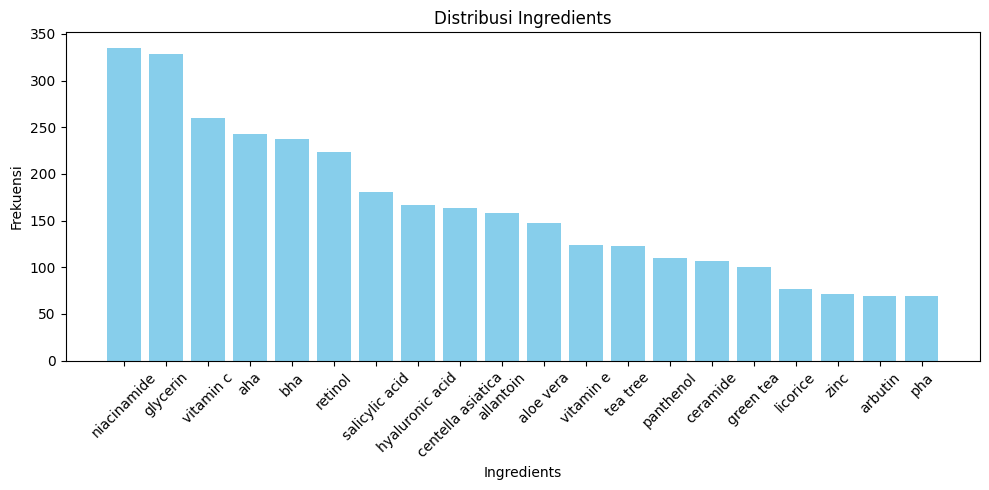

In [314]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten semua ingredients menjadi satu list
all_ingredients = [item for sublist in df_cleaned['ingredients'] for item in sublist]

# Hitung frekuensi kemunculan setiap ingredient
ingredient_counts = Counter(all_ingredients)

# Ambil ingredients yang sering muncul
common_ingredients = ingredient_counts.most_common(50)

for ingredient, count in common_ingredients:
    print(f"{ingredient}: {count} kali")

# Data untuk plot
labels, values = zip(*common_ingredients)

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.title('Distribusi Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Augmentasi Data

In [315]:
valid_skin_types = ['dry', 'oily', 'normal', 'combination']
valid_skin_concerns = ['acne', 'dark spots', 'hyperpigmentation', 'wrinkles', 'redness',
                       'oiliness', 'dryness', 'pores', 'uneven texture', 'fine lines',
                       'blackheads', 'whiteheads', 'sensitive', 'dull skin', 'tiny bumps',
                       'flaky skin', 'irritation']
valid_skin_goals = ['brightening', 'glowing','plumping', 'hydrating', 'firming',
                    'smootihing','tone-evening', 'anti-aging', 'barrier-repair',
                    'oil-control', 'pore-minimizing', 'scar-fading', 'refreshing',
                    'regeretaring', 'healthy', 'nourishing', 'calming', 'lightweight', 'non-comedogenic']

In [316]:
from collections import Counter, defaultdict
import random

# 1. Hitung label awal
all_ingredients_flat = [label for labels in df_cleaned['ingredients'] for label in labels]
label_counts = Counter(all_ingredients_flat)

# 2. Tetapkan threshold minoritas dan target maksimal setelah augmentasi
MINORITY_THRESHOLD = 300
TARGET_LABEL_COUNT = 300

minority_labels = set([label for label, count in label_counts.items() if count < MINORITY_THRESHOLD])

# 3. Valid skin_concern dan skin_goal
# valid_skin_concerns = sorted(set([c for sublist in df_cleaned['skin_concern'] for c in sublist]))
# valid_skin_goals = sorted(set([g for sublist in df_cleaned['skin_goal'] for g in sublist]))

# 4. Salin label_counts agar kita bisa update saat augmentasi
augmented_label_counts = dict(label_counts)
augmented_data = []

# 5. Fungsi augmentasi satu baris
def generate_augmented_row(row):
    new_row = row.copy()

    # Acak skin_concern dan skin_goal
    new_row['skin_concern'] = random.sample(new_row['skin_concern'], len(new_row['skin_concern']))
    new_row['skin_goal'] = random.sample(new_row['skin_goal'], len(new_row['skin_goal']))

    # Tambah concern atau goal jika < 3
    if random.random() < 0.5 and len(new_row['skin_concern']) < 3:
        additional = random.choice([c for c in valid_skin_concerns if c not in new_row['skin_concern']])
        new_row['skin_concern'].append(additional)
    elif len(new_row['skin_goal']) < 3:
        additional = random.choice([g for g in valid_skin_goals if g not in new_row['skin_goal']])
        new_row['skin_goal'].append(additional)

    # Simpan hanya label minoritas
    new_ingredients = [label for label in row['ingredients'] if label in minority_labels]

    # Jika tidak ada label minoritas, lewati
    if not new_ingredients:
        return None

    # Cek apakah semua label minoritas ini masih di bawah target
    if all(augmented_label_counts[label] < TARGET_LABEL_COUNT for label in new_ingredients):
        new_row['ingredients'] = new_ingredients
        # Update jumlah label
        for label in new_ingredients:
            augmented_label_counts[label] += 1
        return new_row
    else:
        return None

# 6. Iterasi semua baris dan augment jika memungkinkan
for _, row in df_cleaned.iterrows():
    for _ in range(3):  # Bisa 1–3 augmentasi per baris
        augmented_row = generate_augmented_row(row)
        if augmented_row is not None:
            augmented_data.append(augmented_row)

# 7. Gabungkan
df_augmented = pd.DataFrame(augmented_data)
df_full = pd.concat([df_cleaned, df_augmented], ignore_index=True)


In [317]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   skin_type     1833 non-null   object
 1   skin_concern  1833 non-null   object
 2   skin_goal     1833 non-null   object
 3   ingredients   1833 non-null   object
dtypes: object(4)
memory usage: 57.4+ KB


niacinamide: 335 kali
glycerin: 329 kali
aha: 300 kali
bha: 300 kali
hyaluronic acid: 300 kali
vitamin e: 300 kali
aloe vera: 300 kali
vitamin c: 300 kali
allantoin: 300 kali
salicylic acid: 300 kali
retinol: 300 kali
centella asiatica: 283 kali
green tea: 244 kali
tea tree: 243 kali
panthenol: 194 kali
licorice: 182 kali
ceramide: 174 kali
zinc: 173 kali
arbutin: 135 kali
pha: 69 kali


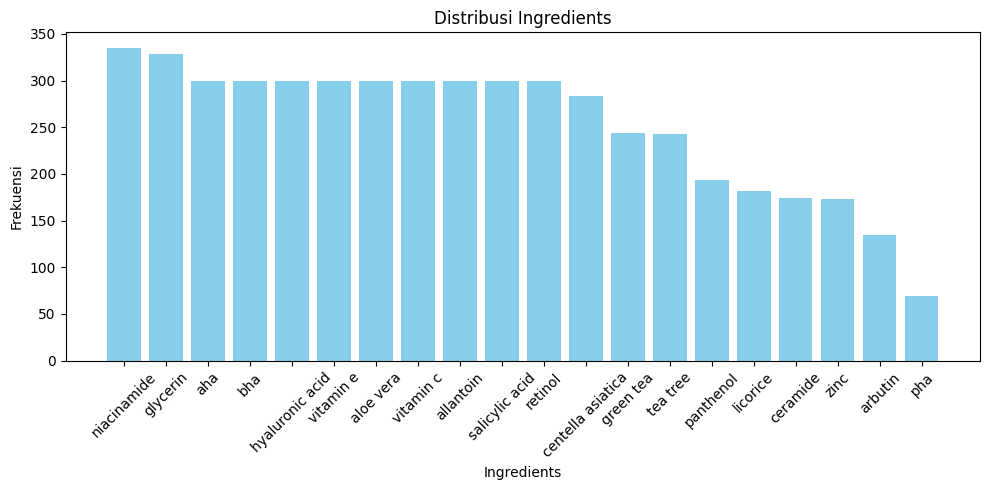

In [318]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten semua ingredients menjadi satu list
all_ingredients = [item for sublist in df_full['ingredients'] for item in sublist]

# Hitung frekuensi kemunculan setiap ingredient
ingredient_counts = Counter(all_ingredients)

# Ambil ingredients yang sering muncul
common_ingredients = ingredient_counts.most_common(50)

for ingredient, count in common_ingredients:
    print(f"{ingredient}: {count} kali")

# Data untuk plot
labels, values = zip(*common_ingredients)

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.title('Distribusi Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [319]:
from collections import Counter, defaultdict
import random

# 1. Hitung label awal
all_ingredients_flat = [label for labels in df_full['ingredients'] for label in labels]
label_counts = Counter(all_ingredients_flat)

# 2. Tetapkan threshold minoritas dan target maksimal setelah augmentasi
MINORITY_THRESHOLD = 275
TARGET_LABEL_COUNT = 250

minority_labels = set([label for label, count in label_counts.items() if count < MINORITY_THRESHOLD])

# 3. Valid skin_concern dan skin_goal
# valid_skin_concerns = sorted(set([c for sublist in df_full['skin_concern'] for c in sublist]))
# valid_skin_goals = sorted(set([g for sublist in df_full['skin_goal'] for g in sublist]))

# 4. Salin label_counts agar kita bisa update saat augmentasi
augmented_label_counts = dict(label_counts)
augmented_data = []

# 5. Fungsi augmentasi satu baris
def generate_augmented_row(row):
    new_row = row.copy()

    # Acak skin_concern dan skin_goal
    new_row['skin_concern'] = random.sample(new_row['skin_concern'], len(new_row['skin_concern']))
    new_row['skin_goal'] = random.sample(new_row['skin_goal'], len(new_row['skin_goal']))

    # Tambah concern atau goal jika < 3
    if random.random() < 0.5 and len(new_row['skin_concern']) < 3:
        additional = random.choice([c for c in valid_skin_concerns if c not in new_row['skin_concern']])
        new_row['skin_concern'].append(additional)
    elif len(new_row['skin_goal']) < 3:
        additional = random.choice([g for g in valid_skin_goals if g not in new_row['skin_goal']])
        new_row['skin_goal'].append(additional)

    # Simpan hanya label minoritas
    new_ingredients = [label for label in row['ingredients'] if label in minority_labels]

    # Jika tidak ada label minoritas, lewati
    if not new_ingredients:
        return None

    # Cek apakah semua label minoritas ini masih di bawah target
    if all(augmented_label_counts[label] < TARGET_LABEL_COUNT for label in new_ingredients):
        new_row['ingredients'] = new_ingredients
        # Update jumlah label
        for label in new_ingredients:
            augmented_label_counts[label] += 1
        return new_row
    else:
        return None

# 6. Iterasi semua baris dan augment jika memungkinkan
for _, row in df_full.iterrows():
    for _ in range(3):  # Bisa 1–3 augmentasi per baris
        augmented_row = generate_augmented_row(row)
        if augmented_row is not None:
            augmented_data.append(augmented_row)

# 7. Gabungkan
df_augmented = pd.DataFrame(augmented_data)
df_full_2 = pd.concat([df_full, df_augmented], ignore_index=True)


niacinamide: 335 kali
glycerin: 329 kali
aha: 300 kali
bha: 300 kali
hyaluronic acid: 300 kali
vitamin e: 300 kali
aloe vera: 300 kali
vitamin c: 300 kali
allantoin: 300 kali
salicylic acid: 300 kali
retinol: 300 kali
centella asiatica: 283 kali
green tea: 250 kali
zinc: 250 kali
tea tree: 250 kali
arbutin: 250 kali
panthenol: 250 kali
licorice: 250 kali
ceramide: 250 kali
pha: 168 kali


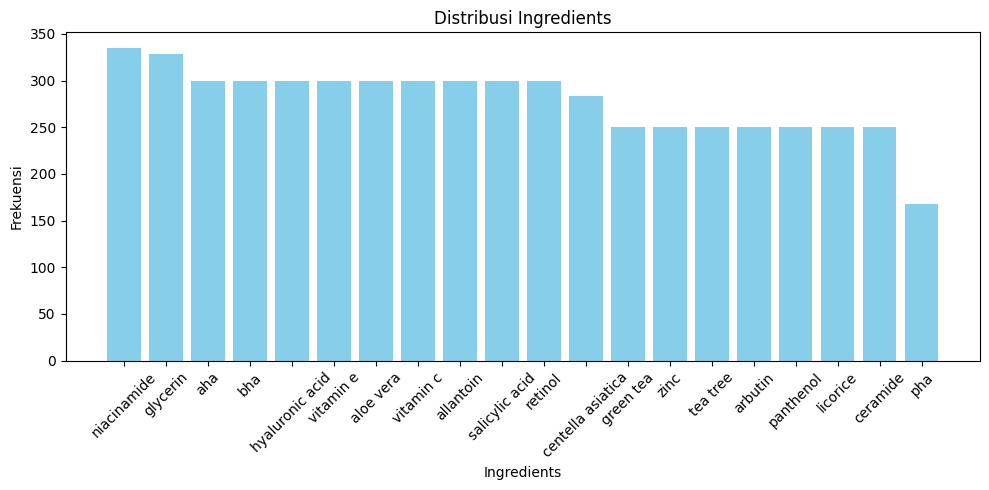

In [320]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten semua ingredients menjadi satu list
all_ingredients = [item for sublist in df_full_2['ingredients'] for item in sublist]

# Hitung frekuensi kemunculan setiap ingredient
ingredient_counts = Counter(all_ingredients)

# Ambil ingredients yang sering muncul
common_ingredients = ingredient_counts.most_common(50)

for ingredient, count in common_ingredients:
    print(f"{ingredient}: {count} kali")

# Data untuk plot
labels, values = zip(*common_ingredients)

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.title('Distribusi Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [321]:
df_full_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   skin_type     2266 non-null   object
 1   skin_concern  2266 non-null   object
 2   skin_goal     2266 non-null   object
 3   ingredients   2266 non-null   object
dtypes: object(4)
memory usage: 70.9+ KB


In [322]:
df_model = df_full_2.copy()

# Modeling

In [362]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

ModuleNotFoundError: No module named 'keras_focal_loss'

In [364]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        """
        Focal loss for multi-label classification.
        y_true: ground truth labels, shape of [batch_size, num_classes]
        y_pred: predicted probabilities, shape of [batch_size, num_classes]
        """
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        cross_entropy = -y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred)
        weight = alpha * y_true * K.pow(1 - y_pred, gamma) + \
                 (1 - alpha) * (1 - y_true) * K.pow(y_pred, gamma)
        loss = weight * cross_entropy

        return K.mean(K.sum(loss, axis=1))  # sum over classes, mean over batch
    return focal_loss_fixed

## Data preparation

In [406]:
# 1. Encode label multi-label jadi multi-hot
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df_model['ingredients'])
all_ingredients = mlb.classes_

In [407]:
print(all_ingredients)
print(len(all_ingredients))

['aha' 'allantoin' 'aloe vera' 'arbutin' 'bha' 'centella asiatica'
 'ceramide' 'glycerin' 'green tea' 'hyaluronic acid' 'licorice'
 'niacinamide' 'panthenol' 'pha' 'retinol' 'salicylic acid' 'tea tree'
 'vitamin c' 'vitamin e' 'zinc']
20


In [408]:
# Gabungkan tiga fitur menjadi satu string
df_model['text_input'] = df_model.apply(lambda row: ' '.join(row['skin_type'] + row['skin_concern'] + row['skin_goal']), axis=1)

In [411]:

# 2. Split dataset (75% train, 15% val, 10% test)
X_temp, X_test, y_temp, y_test = train_test_split(df_model['text_input'], y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1667, random_state=42)

X_train = X_train.astype(str).to_numpy()
X_val = X_val.astype(str).to_numpy()
X_test = X_test.astype(str).to_numpy()

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1699,)
(340,)
(227,)


In [412]:
# 3. Text vectorization setup
vectorizer = TextVectorization(
    max_tokens=200,
    output_mode='multi_hot'
)
vectorizer.adapt(X_train)

## Build Model

In [556]:
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model

model = tf.keras.Sequential([
    vectorizer,
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(all_ingredients), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss=focal_loss(alpha=0.25, gamma=2),  # tetap pakai focal loss
    metrics=[
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)


In [557]:
# 7. Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=500,
    batch_size=32
)

Epoch 1/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - auc: 0.4921 - loss: 1.8000 - precision: 0.1158 - recall: 0.2207 - val_auc: 0.5367 - val_loss: 0.7431 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.5285 - loss: 0.8513 - precision: 0.0723 - recall: 0.0021 - val_auc: 0.6192 - val_loss: 0.6974 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.5823 - loss: 0.7758 - precision: 0.3339 - recall: 0.0023 - val_auc: 0.6625 - val_loss: 0.6816 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.6172 - loss: 0.7175 - precision: 0.0697 - recall: 1.7196e-04 - val_auc: 0.6819 - val_loss: 0.6755 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6469 - loss: 0.7259 - precision: 0.1688 - recall: 5.3754e-04 - val_auc: 0.6947 - val_loss: 0.6666 - val_pre

## Evaluasi

In [684]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
import random

# 1. Prediksi probabilitas
y_pred = model.predict(X_test)

# 2. Konversi ke nilai 0/1 berdasarkan threshold
TRESHOLD = 0.35
y_pred_binary = (y_pred >= TRESHOLD).astype(int)

# 3. Evaluasi model
precision = precision_score(y_test, y_pred_binary, average='micro')
recall = recall_score(y_test, y_pred_binary, average='micro')
f1 = f1_score(y_test, y_pred_binary, average='micro')
hamming = hamming_loss(y_test, y_pred_binary)

# 4. Tampilkan hasil
print("📊 Evaluasi Model Multi-Label Classification")
print("Precision        :", precision)
print("Recall           :", recall)
print("F1 Score         :", f1)
print("Hamming Loss     :", hamming)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
📊 Evaluasi Model Multi-Label Classification
Precision        : 0.6627218934911243
Recall           : 0.6010733452593918
F1 Score         : 0.6303939962476548
Hamming Loss     : 0.086784140969163


In [685]:
# Uji prediksi satu sample acak
# Ambil index acak dari data uji
# index = random.randint(0, len(X_test) - 1)
index = 16
# Prediksi biner untuk sample tersebut
sample_pred = np.array([y_pred_binary[index]])
sample_true = np.array([y_test[index]])

# Konversi ke bentuk label ingredients
predicted_ingredients = mlb.inverse_transform(sample_pred)[0]
actual_ingredients = mlb.inverse_transform(sample_true)[0]

# Ambil fitur input aslinya dari X_test_text (sebelum vektorisasi)
input_text = X_test[index]  # Asumsinya kamu menyimpan text asli sebelum tokenizer di X_test_text

print("\nContoh Prediksi dengan Index Acak:", index)
print("Input:")
print(input_text)
print("\nPredicted Ingredients:", predicted_ingredients)
print("Actual Ingredients   :", actual_ingredients)


Contoh Prediksi dengan Index Acak: 16
Input:
combination dry irritation dryness acne redness sensitive tiny bumps blackheads whiteheads oiliness calming lightweight non-comedogenic oil-control brightening fast-absorbing hydrating glowing healthy

Predicted Ingredients: ('glycerin',)
Actual Ingredients   : ('allantoin', 'glycerin', 'vitamin c')


## Inference Model

In [686]:
def predict_ingredients(skin_type_list, skin_concern_list, skin_goal_list, model, mlb, threshold):
    """
    Fungsi untuk prediksi ingredients berdasarkan input user.

    Parameters:
        skin_type_list: list of str
        skin_concern_list: list of str
        skin_goal_list: list of str
        model: model TensorFlow yang sudah dilatih
        mlb: MultiLabelBinarizer yang sudah dilatih
        threshold: float

    Returns:
        List of predicted ingredients
    """
    # Gabungkan input menjadi satu string seperti pada preprocessing
    text_input = ' '.join(skin_type_list + skin_concern_list + skin_goal_list)

    # Konversi jadi array string NumPy
    text_array = np.array([text_input], dtype=object)

    # Prediksi probabilitas
    pred_probs = model.predict(text_array)

    # Threshold → multi-label biner
    pred_binary = (pred_probs >= threshold).astype(int)

    # Decode kembali ke label ingredients
    predicted_labels = mlb.inverse_transform(pred_binary)[0]

    return predicted_labels

In [702]:
# Input user (bisa dikosongkan sebagian)
skin_type_input = ['dry']
skin_concern_input = ['acne','irritation','sensitive','redness']
skin_goal_input = ['glowing','brightening']

predicted = predict_ingredients(
    skin_type_input,
    skin_concern_input,
    skin_goal_input,
    model=model,
    mlb=mlb,
    threshold=0.4
)
if not predicted:
    print("changing treshold to 0.35...")
    predicted = predict_ingredients(
        skin_type_input,
        skin_concern_input,
        skin_goal_input,
        model=model,
        mlb=mlb,
        threshold=0.35
    )
    if not predicted:
        print("changing treshold to 0.3...")
        predicted = predict_ingredients(
            skin_type_input,
            skin_concern_input,
            skin_goal_input,
            model=model,
            mlb=mlb,
            threshold=0.3
        )

print("Predicted Ingredients:", predicted)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Ingredients: ('vitamin c',)


## Save Model

In [705]:
# Simpan model TensorFlow
model.save('ingredients_classification_model.keras')

# Simpan MultiLabelBinarizer pakai pickle
import pickle
with open('ingredients_mlb.pkl', 'wb') as f:
    pickle.dump(mlb, f)